In [5]:
import pennylane as qml
import numpy as np

In [18]:
num_qubits = 4
dev = qml.device("default.qubit", wires=num_qubits, shots=None)

@qml.qnode(dev)
def circuit(params):
    param_index=0
    for i in range(num_qubits):
        qml.RY(params[param_index], wires=i)
        param_index += 1

    qml.Barrier()

    # Apply entanglement
    for j in reversed(range(1, num_qubits)):
        qml.CNOT(wires=[j, j-1])

    qml.Barrier()

    # Apply RY rotations
    for k in range(num_qubits):
        qml.RY(params[param_index], wires=k)
        param_index += 1

In [19]:
params = np.random.random(size=2*num_qubits)
qml.draw(circuit)(params)

'0: ──RY(0.78)──||───────╭X──||──RY(0.85)─┤  \n1: ──RY(0.20)──||────╭X─╰●──||──RY(0.46)─┤  \n2: ──RY(0.44)──||─╭X─╰●─────||──RY(0.04)─┤  \n3: ──RY(0.72)──||─╰●────────||──RY(0.68)─┤  '

(<Figure size 1000x500 with 1 Axes>, <Axes: >)

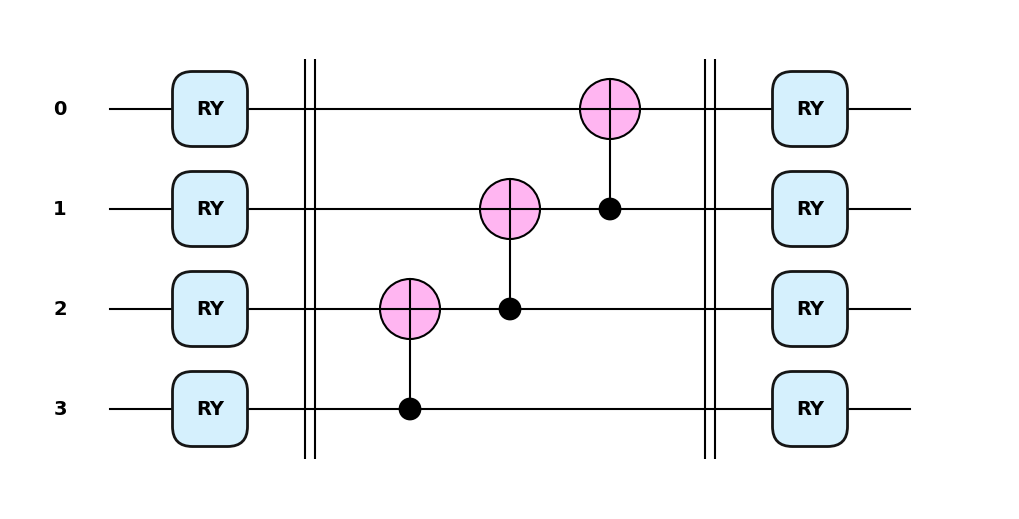

In [20]:
qml.draw_mpl(circuit, style="pennylane")(params)